# Environment Setting

Three distinct grayscale images, namely "KU", "Golf", and "Gundam" images have been imported from local directory as two-dimensional numpy arrays that contains the pixel intensities, defined by the convention 'ImageName_data'.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# define the width and height of your image
width = 720
height = 560

# read the file
with open(r'C:\Users\samsung\Desktop\KECE471\KU.raw', 'rb') as f:
    data = f.read()

# convert the data to numpy array and reshape
KU_data = np.frombuffer(data, dtype=np.uint8).reshape(height, width)

# create a PIL image from the numpy array
KU_image = Image.fromarray(KU_data)

# show the image
KU_image.show()

In [ ]:
width = 600
height = 600

with open(r'C:\Users\samsung\Desktop\KECE471\Gundam.raw', 'rb') as f:
    data = f.read()
Gundam_data = np.frombuffer(data, dtype=np.uint8).reshape(height, width)
Gundam_image = Image.fromarray(Gundam_data)
Gundam_image.show()

width = 800
height = 540

with open(r'C:\Users\samsung\Desktop\KECE471\Golf.raw', 'rb') as f:
    data = f.read()
Golf_data = np.frombuffer(data, dtype=np.uint8).reshape(height, width)
Golf_image = Image.fromarray(Golf_data)
Golf_image.show()

We now proceed to the image segmentation task with two distinct methodologies: K-means algorithm and Expectation Maximization (EM) algorithm. These techniques will be evaluated under varying number of clusters = 2, 4, or 8, respectively.

The algorithms have been implemented from scratch, utilizing only the numpy package. In the purpose of enhanced algorithmic performance and numerical stability, we rescale the pixel intensities of the image to the [0,1] interval.

# K-means algorithm

* We used the absolute difference as distance metric for one-dimensional pixel intensities.
* We initialized the cluster centers randomly, drawing directly from the dataset's pixel values. This selection process was conducted without replacement, ensuring the distinctness of each initial center.

In [ ]:
def Kmeans(Image_data, K):
    data = Image_data.flatten() / 255.0
    centers = np.random.choice(data, K, replace = False)
    i=0
    epsilon = 1e-6

    print('Number of cluster K:{0}\n'.format(K))
    while True:
        i+=1
        # Step 1: Compute the distance of pixels and each centers and allocate label, print out the cost
        difference = np.abs(data[:, np.newaxis] - centers)
        print('Cost for iteration {0}: {1}'.format(i, np.sum(np.min(difference, axis = 1))))
        clusters = np.argmin(difference, axis = 1)

        # Step 2: Compute centroids of pixels in each label
        centroids = np.array([data[clusters == j].mean() if np.any(clusters==j) else np.random.choice(data) for j in range(K)])

        # Step 3: Update centroids to new centers, if there's no difference, stop iteration
        if np.allclose(centers, centroids, atol = epsilon):
            break
        centers = centroids

    # Step 4: Replace each pixels with it's cluster center, reshape to original image shape and return
    segmented = centers[clusters]
    segmented_data = segmented.reshape(Image_data.shape[0], Image_data.shape[1]) * 255.0
    segmented_data = segmented_data.astype(np.uint8)

    return segmented_data, centers

At each iteration we printed out the computed cost, and visualized the final segmented image at the end of step.

Number of cluster K:2

Cost for iteration 1: 52970.28235294117
Cost for iteration 2: 50297.4000715569
Cost for iteration 3: 49536.955628248375
Cost for iteration 4: 48539.1869696287
Cost for iteration 5: 47846.73309871298
Cost for iteration 6: 47278.19962126065
Cost for iteration 7: 46784.39495361047
Cost for iteration 8: 46216.8546133303
Cost for iteration 9: 45650.64466501941
Cost for iteration 10: 45175.747202288956
Cost for iteration 11: 44838.997337706845
Cost for iteration 12: 44616.140307380665
Cost for iteration 13: 44540.01858102978


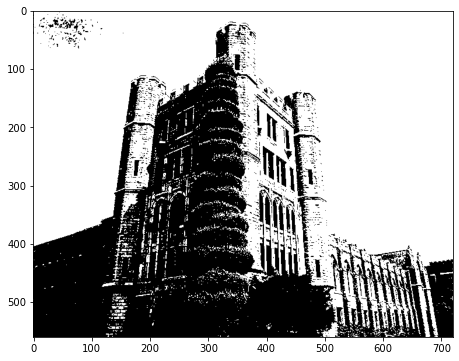

Number of cluster K:4

Cost for iteration 1: 25544.02352941177
Cost for iteration 2: 21052.497352842725
Cost for iteration 3: 20841.16785824882
Cost for iteration 4: 20804.736000529767
Cost for iteration 5: 20801.295768734362
Cost for iteration 6: 20817.786934504118


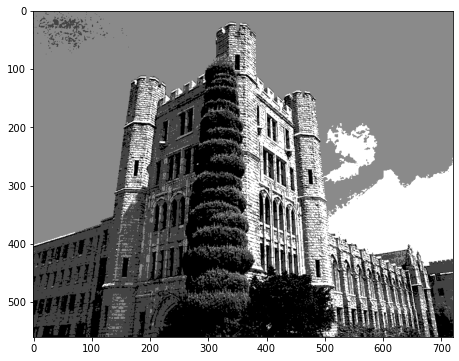

Number of cluster K:8

Cost for iteration 1: 16051.454901960784
Cost for iteration 2: 12361.805557737773
Cost for iteration 3: 11287.904959627404
Cost for iteration 4: 10947.878582684514
Cost for iteration 5: 10814.91901885383
Cost for iteration 6: 10791.370097410836
Cost for iteration 7: 10821.67178911106
Cost for iteration 8: 10868.15304662337
Cost for iteration 9: 10916.213471984382
Cost for iteration 10: 10952.974465283267
Cost for iteration 11: 11014.27584143919
Cost for iteration 12: 11052.705120214769
Cost for iteration 13: 11092.455603404005
Cost for iteration 14: 11101.509663988643
Cost for iteration 15: 11130.489546709694
Cost for iteration 16: 11163.380990125075
Cost for iteration 17: 11193.689147078552


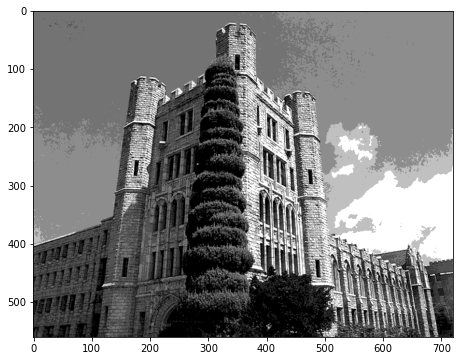

Number of cluster K:2

Cost for iteration 1: 75831.35294117645
Cost for iteration 2: 55082.52280074928
Cost for iteration 3: 47309.77726526794
Cost for iteration 4: 43978.73802405649
Cost for iteration 5: 43423.75514240104
Cost for iteration 6: 44161.68112821038
Cost for iteration 7: 44518.5776546089
Cost for iteration 8: 44631.95492557604
Cost for iteration 9: 44757.21766821424


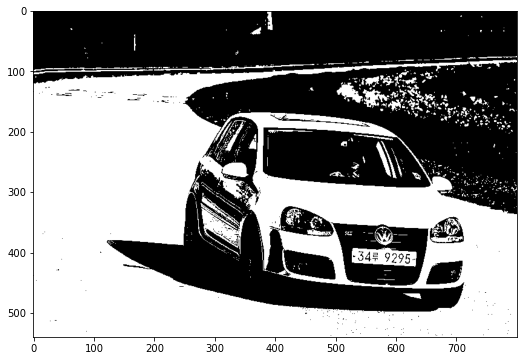

Number of cluster K:4

Cost for iteration 1: 32727.73333333334
Cost for iteration 2: 29498.95223762988
Cost for iteration 3: 30504.402384014193
Cost for iteration 4: 30800.07099244222
Cost for iteration 5: 31111.99799024897
Cost for iteration 6: 31242.051009142073
Cost for iteration 7: 31431.3768473065
Cost for iteration 8: 31333.925769314028
Cost for iteration 9: 30449.118716358953
Cost for iteration 10: 27339.460506416348
Cost for iteration 11: 22746.249855724454
Cost for iteration 12: 21331.459629444853
Cost for iteration 13: 20992.281172629915
Cost for iteration 14: 20860.412729130694
Cost for iteration 15: 20816.37584400522
Cost for iteration 16: 20749.607394937244
Cost for iteration 17: 20718.828153125967


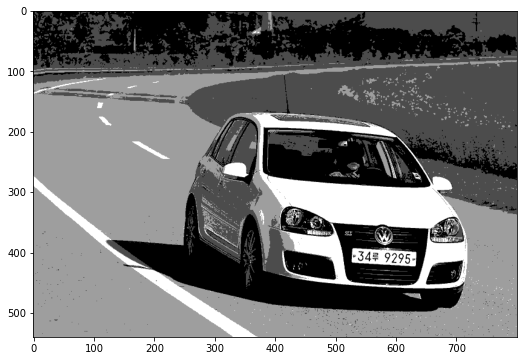

Number of cluster K:8

Cost for iteration 1: 21919.7294117647
Cost for iteration 2: 13284.267850448265
Cost for iteration 3: 12112.294591259117
Cost for iteration 4: 11547.316719870147
Cost for iteration 5: 11253.702272550554
Cost for iteration 6: 11123.046918128783
Cost for iteration 7: 11053.410633610896
Cost for iteration 8: 10998.877500596976
Cost for iteration 9: 10970.455679738792
Cost for iteration 10: 10931.87535716032
Cost for iteration 11: 10916.00889671686
Cost for iteration 12: 10906.675250373486
Cost for iteration 13: 10870.593807753885
Cost for iteration 14: 10843.411478831771
Cost for iteration 15: 10825.866788824644
Cost for iteration 16: 10794.173572116342
Cost for iteration 17: 10778.643304687992
Cost for iteration 18: 10769.250272029687
Cost for iteration 19: 10745.62452690857
Cost for iteration 20: 10741.038283730926
Cost for iteration 21: 10726.141955995978
Cost for iteration 22: 10710.055179229641
Cost for iteration 23: 10705.62880090903
Cost for iteration 24: 106

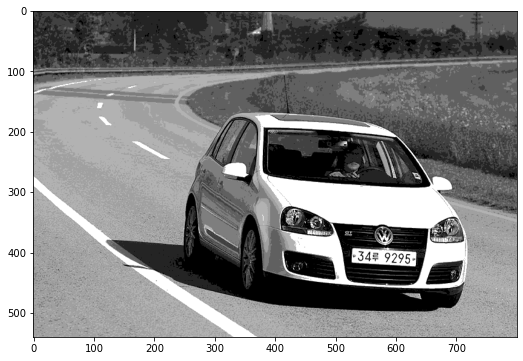

Number of cluster K:2

Cost for iteration 1: 25544.219607843123
Cost for iteration 2: 23008.414050551826
Cost for iteration 3: 23086.88688857628
Cost for iteration 4: 23119.62354745299


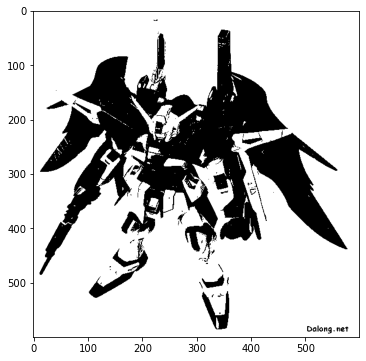

Number of cluster K:4

Cost for iteration 1: 16902.650980392165
Cost for iteration 2: 14444.364101529485
Cost for iteration 3: 14521.208966669836
Cost for iteration 4: 14694.262780123187
Cost for iteration 5: 14856.190363589461
Cost for iteration 6: 14928.299171036111
Cost for iteration 7: 15012.19526755714
Cost for iteration 8: 15060.54916333517
Cost for iteration 9: 15072.377466659393
Cost for iteration 10: 15102.411317150845
Cost for iteration 11: 15078.42955083727
Cost for iteration 12: 14980.64034939761
Cost for iteration 13: 14840.99051699614
Cost for iteration 14: 14713.411774685283
Cost for iteration 15: 14641.183988885994
Cost for iteration 16: 14602.181943775364
Cost for iteration 17: 14561.604619199534
Cost for iteration 18: 14460.39315546006
Cost for iteration 19: 14338.166522212096
Cost for iteration 20: 14254.35515332966
Cost for iteration 21: 14193.65846110032
Cost for iteration 22: 14174.930724670201
Cost for iteration 23: 14134.327959245265
Cost for iteration 24: 14111

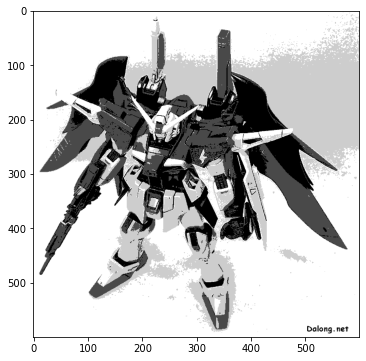

Number of cluster K:8

Cost for iteration 1: 13679.176470588229
Cost for iteration 2: 11939.057212967287
Cost for iteration 3: 11605.768189571801
Cost for iteration 4: 11323.127212542387
Cost for iteration 5: 10931.685243497366
Cost for iteration 6: 10448.250888663004
Cost for iteration 7: 10043.504543287117
Cost for iteration 8: 9700.54827823942
Cost for iteration 9: 9478.175064209096
Cost for iteration 10: 9197.352151877107
Cost for iteration 11: 8977.06535726541
Cost for iteration 12: 8841.353891616413
Cost for iteration 13: 8755.86017747383
Cost for iteration 14: 8675.918836410807
Cost for iteration 15: 8595.404665101112
Cost for iteration 16: 8523.504748096684
Cost for iteration 17: 8442.607466132002
Cost for iteration 18: 8346.320296801416
Cost for iteration 19: 8280.850253565131
Cost for iteration 20: 8243.5839163565
Cost for iteration 21: 8217.290218911807
Cost for iteration 22: 8202.142131647688
Cost for iteration 23: 8194.195384192044
Cost for iteration 24: 8198.28838562265
C

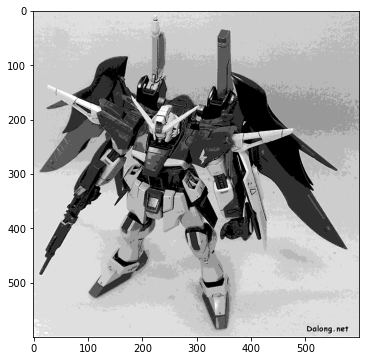

In [ ]:
for data in [KU_data, Golf_data, Gundam_data]:
    for k in [2, 4, 8]:
        result, C = Kmeans(data, k)
        result_img = Image.fromarray(result)
        plt.figure(figsize=(10,6))
        plt.imshow(result_img, cmap='gray')
        plt.show()

# EM algorithm with Gaussian Mixture Model

* Given our data is one-dimensional (derived from grayscale images), we are under the assumption that the underlying Gaussians are univariate and isotropic. Consequently, the integration of covariance matrices into our model is unnecessary.

* The strategy used for setting initial means for each cluster is analogous to that of the K-means algorithm. For the variance initialization, we adopted a uniform approach, utilizing the overall variance of the image's pixel values. Lastly, the mixture coefficients were randomly initialized following a Dirichlet distribution.

* The choice for Dirichlet distribution is derived from the characteristic that it yields a set of probabilities that sum to one. The Dirichlet distribution is a multivariate generalization of the Beta distribution and is commonly used as a prior distribution in Bayesian statistics precisely because it generates samples that can be interpreted as probabilities. Therefore, initializing the mixture coefficients from a Dirichlet distribution is well-aligned with the nature of Gaussian Mixture Model.

In [ ]:
def Gaussian_pdf(x, mean, variance):
    epsilon = 1e-6
    floor_variance = 1e-2
    variance = max(variance, floor_variance)
    return (1./np.sqrt(2*np.pi*(variance+epsilon))) * np.exp(-np.square(x-mean) / (2*(variance+epsilon)))

def GMM(Image_data, K, num_iter):
    data = Image_data.flatten() / 255.0
    means = np.random.choice(data, K, replace = False)
    # means = C
    variances = np.repeat(np.square(data.std()), K)
    coefficients = np.random.dirichlet(np.ones(K))

    L = 0
    epsilon = 1e-6

    for i in range(num_iter):
        # E-step
        # weighted density of each data points under each Gaussian
        density = np.array([coeff * Gaussian_pdf(data, m, var) for coeff, m, var in zip(coefficients, means, variances)])

        # normalize to compute likelihood probability of each pixels across all Gaussians sum to 1

        likelihood = density / np.sum(density, axis = 0)
        # compute log likelihood, measure of probability of observed data given the parameters of the model, to check convergence
        new_L = np.sum(np.log(np.sum(density, axis = 0) + epsilon))
        if np.abs(L - new_L) < epsilon:
            break
        L = new_L

        # M-step
        # update coefficients, means, and variances
        summation = np.sum(likelihood, axis = 1)
        coefficients = summation / data.size
        means = np.dot(likelihood, data) / summation
        variances = np.sum(np.multiply(likelihood, np.square(data - means[:, np.newaxis])), axis = 1) / summation

    segmented = means[np.argmax(likelihood, axis = 0)]
    segmented_data = segmented.reshape(Image_data.shape[0], Image_data.shape[1]) * 255.0
    segmented_data = segmented_data.astype(np.uint8)

    return segmented_data, coefficients, means, variances

[ 47.52127607  75.23916167 188.51922022 188.51922022  78.43479265
 188.51922022 188.51922022 188.51922022]


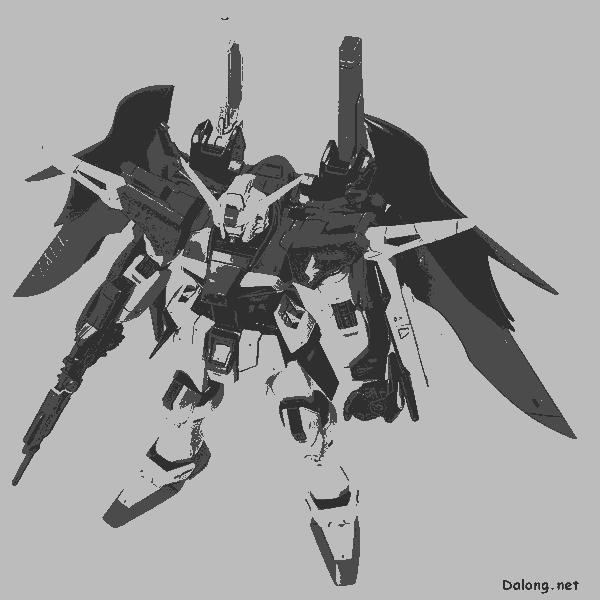

In [ ]:
test, p, m, v = GMM(Gundam_data, 8, 100)
m *= 255.0
test_img = Image.fromarray(test)
print(m)
test_img

We printed out the final converged parameters, i.e. mixing probability, mean, and variance of each Gaussian parameters. We also visualized the final segmented images.
We randomly set iteration number to 100.

Number of cluster K:2

Mixing probability: [0.2835442 0.7164558]
Mean: [155.12141591  88.187433  ]
Variance: [0.04394603 0.0301355 ]


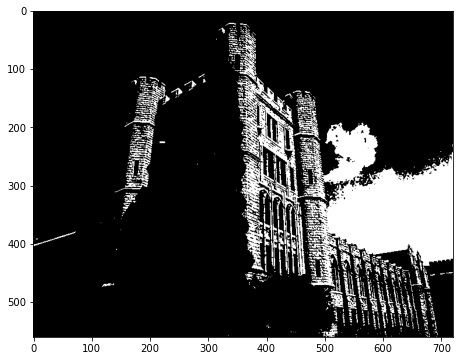

Number of cluster K:4

Mixing probability: [0.58412564 0.13130085 0.00555538 0.27901813]
Mean: [116.02078774 206.80992137  83.05689667  42.21850528]
Variance: [0.0091646  0.00912576 0.01828415 0.00893202]


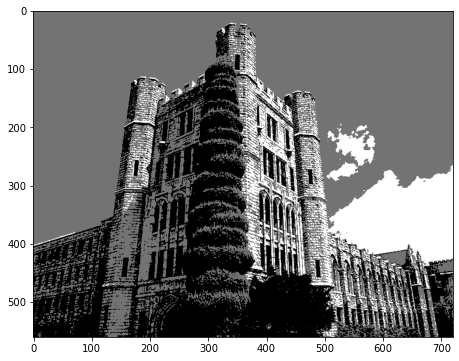

Number of cluster K:8

Mixing probability: [0.03398041 0.0144678  0.13043206 0.08199836 0.26575232 0.00529639
 0.35307639 0.11499627]
Mean: [ 95.26907313  98.25451529 207.01305095 116.49422472  41.39450623
  80.33893352 116.49405065 116.49422303]
Variance: [0.01836858 0.01731409 0.00906338 0.00908576 0.00877669 0.01842422
 0.00908576 0.00908576]


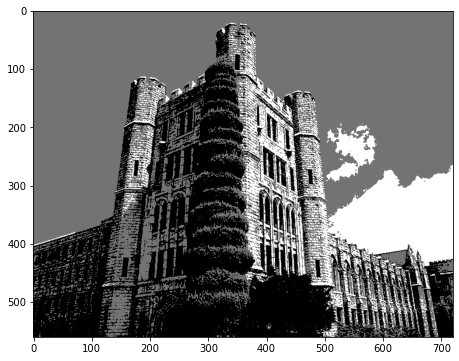

Number of cluster K:2

Mixing probability: [0.25707379 0.74292621]
Mean: [ 42.29283653 137.17528274]
Variance: [0.01108204 0.03852383]


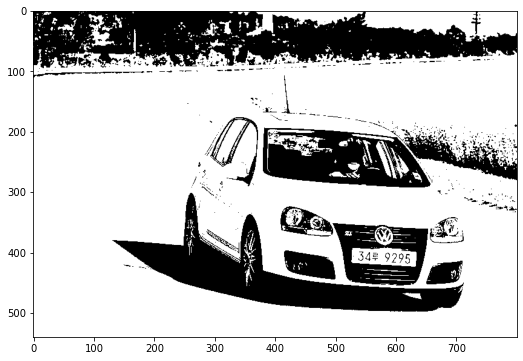

Number of cluster K:4

Mixing probability: [0.08820627 0.21082696 0.41725347 0.2837133 ]
Mean: [227.68370473  33.93737813 148.63161996  82.93015882]
Variance: [0.00392026 0.0085485  0.00704541 0.0092494 ]


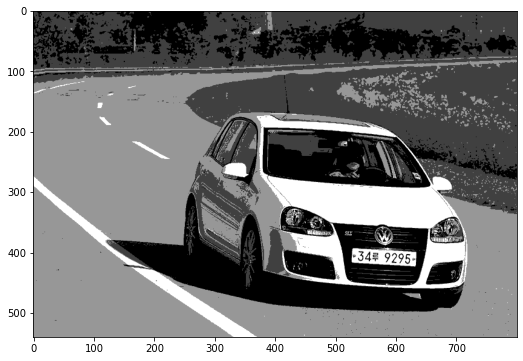

Number of cluster K:8

Mixing probability: [0.06237543 0.22479235 0.1557751  0.04991843 0.14586699 0.22721109
 0.0455811  0.0884795 ]
Mean: [ 83.81151093 148.18133082  83.77378669 148.18130089 148.18138909
  35.81045707  85.69100764 227.6418743 ]
Variance: [0.00893    0.00725367 0.0089313  0.00725368 0.00725366 0.00909308
 0.00888371 0.00392784]


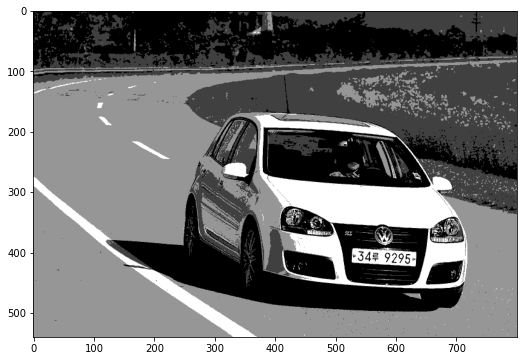

Number of cluster K:2

Mixing probability: [0.24934216 0.75065784]
Mean: [ 60.97039589 188.49063184]
Variance: [0.01261157 0.00553902]


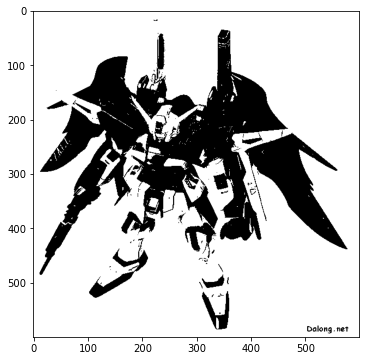

Number of cluster K:4

Mixing probability: [0.16219542 0.08747263 0.45815718 0.29217477]
Mean: [ 69.55658511  45.28388161 188.51869698 188.51869698]
Variance: [0.01127328 0.00939223 0.00551284 0.00551284]


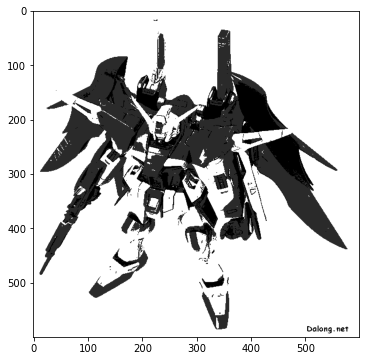

Number of cluster K:8

Mixing probability: [0.0705597  0.03706812 0.22636194 0.15468942 0.12921117 0.14216751
 0.03353008 0.20641206]
Mean: [ 64.03918373  83.76611763 188.52718256 188.52718256 188.52718256
  53.71727083 188.52718256 188.52718256]
Variance: [0.01215799 0.0094537  0.00550703 0.00550703 0.00550703 0.01088231
 0.00550703 0.00550703]


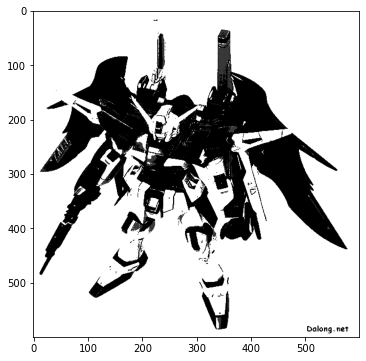

In [ ]:
for data in [KU_data, Golf_data, Gundam_data]:
    for k in [2, 4, 8]:
        result2, P, M, V = GMM(data, k, 100)
        # Convert to real pixel values
        M = M*255.0

        print('Number of cluster K:{0}\n'.format(k))
        print('Mixing probability:',P)
        print('Mean:',M)
        print('Variance:',V)
        result2_img = Image.fromarray(result2)
        plt.figure(figsize=(10,6))
        plt.imshow(result2_img, cmap='gray')
        plt.show()

In the case of the 'Gundam' image, we encountered a recurrent pattern where, at K=4, two clusters consistently converged to the same mean and variance. Similarly, at K=8, multiple clusters exhibited convergence to identical mean and variance values. This tendency persisted even with an increased number of iterations, indicating no substantial improvement. However, we observed that introducing random variations in the initial parameters sporadically led to improved outcomes.

Using segmented centroids of result of K-means algorithm also showed limited impovement.

### Additional observation

In the early experimentation without normalization on the 'Golf' image, we noticed that if the parameters were initialized randomly, the model frequently settled into a local optimum, where the means were approximately 112.7 to 112.8. The model exhibited significant transitions during the 250th to 300th iteration for K=2, the 350th to 400th iteration for K=4, and again the 250th to 300th iteration for K=8, suggesting a high sensitivity to the initial setup.

However, we observed an improvement in these behaviors upon applying normalization techniques. Specifically, Min-Max normalization outperformed Z-score normalization in our experiment. This can be attributed to the non-normal distribution of pixel values in the 'Golf' image, a characteristic that made Min-Max scaling more suitable in preserving the original distribution of pixel intensities. As such, Min-Max scaling effectively mitigated the local optima issue and boosted the overall performance of the model.